#Importing Libraries

In [15]:
import pandas as pd #Pandas for some useful actions
import numpy as np #Numpy for Linear Algebra

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
#Tensorflow for NN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import callbacks

#Visualization Libraries

#Data

In [4]:
data = pd.read_csv("apple_quality.csv") #call the data
data = data.drop("A_id",axis=1) #Drop unnecessary column
data.sample(10) #Random 10 values

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
2036,-0.568806,-1.893882,1.450928,0.545213,-3.622028,-0.952010,-1.373321887,bad
1389,-3.607746,-0.759695,1.634866,-1.217979,1.414093,0.364305,-3.518392042,good
2677,-0.997107,-2.385246,-2.422589,-0.756712,4.433900,2.432465,1.691025405,bad
23,0.135714,-0.753757,-2.196146,1.039276,0.580538,0.227309,2.086618541,bad
1694,-3.493469,0.272105,2.259878,-1.611763,3.008827,-0.328766,-1.679271349,good
2027,3.026625,-0.767463,-3.016153,-0.285969,1.866203,1.471523,0.432627179,good
985,-1.857784,2.348860,0.540231,-0.565698,1.609930,-3.109113,1.230691463,good
2542,1.706310,0.234132,-1.848696,1.285824,2.152655,-0.857856,0.97422529,bad
2322,3.098029,-1.732347,-1.507209,-0.216943,4.039246,-0.301570,0.617345483,good
83,1.410349,-6.235107,0.606679,2.781526,0.188419,-1.655568,1.787465613,good


In [10]:
data.shape

(4000, 8)

#Preproccessing

In [5]:
data.dropna(inplace=True) #Drop nan values
data['Quality'] = data['Quality'].replace({'good':1,'bad':0}) #replacing Category columns

#Small conclusions about the data

In [6]:
pd.DataFrame(data.corr()["Quality"]).sort_values(by='Quality', ascending=True)

<ipython-input-6-2618502d9f33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(data.corr()["Quality"]).sort_values(by='Quality', ascending=True)


,Quality
Ripeness,-0.264315
Crunchiness,-0.012376
Weight,0.001421
Size,0.244007
Sweetness,0.250998
Juiciness,0.260223
Quality,1.000000


#Data Visualisation

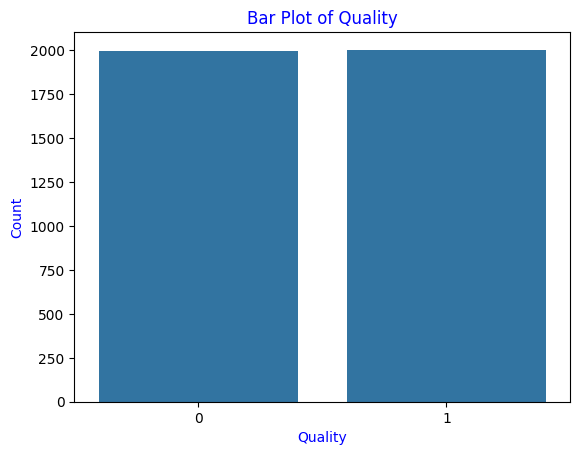

In [7]:
value_counts = data['Quality'].value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel("Quality", color="Blue")
plt.ylabel("Count", color="Blue")
plt.title("Bar Plot of Quality", color="Blue")
plt.show()


#NN model via Tensorflow

Minimum validation loss: 0.19020740687847137


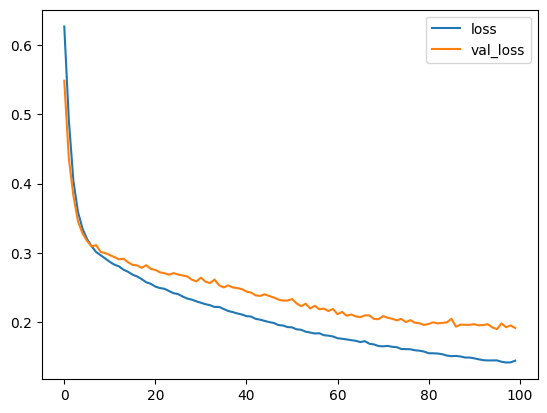

In [16]:
# Split the data into train and test sets
X = data.drop('Quality', axis=1)
y = data['Quality']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Build the neural network model
model = keras.Sequential([
  layers.Dense(16, activation='relu', input_shape=[7]),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate the model
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))